In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from matplotlib import pyplot as plt
import datetime

In [ ]:
propertyData_df1 = pd.read_csv("~/Desktop/cs760/dataset/CSTDAT10655_Output1_20220822.csv",encoding='latin1')
print(propertyData_df1.head())

/var/folders/r9/1hjwpvh90jv3jmvvbc0xj6z80000gn/T/ipykernel_41918/3336403121.py:1: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  propertyData_df1 = pd.read_csv("~/Desktop/cs760/dataset/CSTDAT10655_Output1_20220822.csv",encoding='latin1')


   CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
0   629180     3223584               0                 14    
1   629180     3992193               0                 14    
2   629181      844148               0                 16    
3   629187     6184761               0                 49    
4   629195     4627781               0                  9    

   CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

  CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction CL_Suburb  \
0           Ford                    St                      NaN   Opotiki   
1           Ford      

In [ ]:
propertyData_df2 = pd.read_csv("~/Desktop/cs760/dataset/CSTDAT10655_Output2_20220822.csv",encoding='latin1')
print(propertyData_df2.head())

   CL_QPID   CL_Val_Ref  CL_Latitude  CL_Longitude  CL_Bedrooms  CL_Bathrooms
0  2416987   21851/2755   -43.477322    172.709781          4.0           1.0
1  2847968  28044/40700   -46.062788    170.194987          4.0           1.0
2  3299437    6622/6569          NaN           NaN          NaN           1.0
3   410286   4482/68000   -38.021743    175.324990          2.0           2.0
4  1652110  34643/12025   -37.014415    174.915014          NaN           1.0


In [ ]:
df_GIS = pd.read_csv('/content/drive/MyDrive/760/Final Data/Crime/Geo_table.csv')
print(df_GIS.columns)
df_mapping = df_GIS[['SA12018_code', 'SA22018_code','MB2013_code',
                     'MB2018_code', 'MB2021_code', 'MB2022_code']]
df_mapping

Index(['MB2022_code', 'MB2021_code', 'MB2018_code', 'MB2013_code',
       'MB2011_code', 'MB2010_code', 'MB2006_code', 'MB2001_code',
       'SA12022_code', 'SA12018_code', 'SA22022_code', 'SA22022_name',
       'SA22022_name_ascii', 'SA22018_code', 'SA22018_name', 'UR2022_code',
       'UR2022_name', 'UR2022_name_ascii', 'IUR2022_code', 'IUR2022_name',
       'UR2018_code', 'UR2018_name', 'IUR2018_code', 'IUR2018_name',
       'IUA2022_code', 'IUA2022_name', 'FUA2022_code', 'FUA2022_name',
       'IFUA2022_code', 'IFUA2022_name', 'TFUA2022_code', 'TFUA2022_name',
       'TA2022_code', 'TA2022_name', 'TA2022_name_ascii', 'WARD2022_code',
       'WARD2022_name', 'WARD2022_name_ascii', 'MWARD2022_code',
       'MWARD2022_name', 'MWARD2022_name_ascii', 'CB2022_code', 'CB2022_name',
       'CB2022_name_ascii', 'TASUB2022_code', 'TASUB2022_name',
       'TASUB2022_name_ascii', 'REGC2022_code', 'REGC2022_name',
       'REGC2022_name_ascii', 'CON2022_code', 'CON2022_name',
       'CON2022_nam

,SA12018_code,SA22018_code,MB2013_code,MB2018_code,MB2021_code,MB2022_code
0,7000000,100100,100,100,100,100
1,7000002,100300,501,501,501,501
2,7000001,100100,502,502,502,502
3,7000003,100100,700,700,700,700
4,7000003,100100,800,800,800,800
...,...,...,...,...,...,...
56977,7014616,197600,1206806,4006332,4006332,4018195
56978,7005328,136100,441200,441200,441200,4018213
56979,7006278,141100,502601,502601,502601,4018214
56980,7018787,232700,1799401,4010318,4010318,4018227


In [ ]:
propertyData_df1 = propertyData_df1.rename(columns={'CL_Meshblock':'MB2013_code'})
propertyData_df1=propertyData_df1.merge(df_mapping,on=['MB2013_code'])

In [ ]:
propertyData_df = propertyData_df1.merge(propertyData_df2,on="CL_QPID")
print(propertyData_df)

         CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
0         629180     3223584               0                 14    
1         629180     3992193               0                 14    
2         629180      844145               0                 14    
3         629180      844146               0                 14    
4         629180      844147               0                 14    
...          ...         ...             ...                 ...   
5455775  2982106     5486208               0                250    
5455776  3007424     5228801               0                446    
5455777  3010986     6695903               0                170    
5455778  3062939     5822768               0                 12    
5455779  3067573     6016032               0               360 B   

         CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
0                                      NaN                                NaN   
1                    

In [ ]:
print(propertyData_df['CL_Sale_Date'])

0          2003-07-22
1          2006-10-06
2          1990-06-22
3          1993-04-26
4          1998-03-03
              ...    
5455775    2016-01-15
5455776    2014-10-30
5455777    2021-01-14
5455778    2016-12-05
5455779    2018-05-19
Name: CL_Sale_Date, Length: 5455780, dtype: object


In [ ]:
# Sdate = propertyData_df1['CL_Sale_Date']
# sale_date_format = []
# for i in range(len(Sdate)):
#     fill_leadingZero = str(Sdate[i]).zfill(8)
#     test = datetime.datetime.strptime(
#         str(fill_leadingZero), "%d%m%Y").strftime("%Y-%m-%d")
#     sale_date_format.append(test)
# propertyData_df1['sale_date_formatted'] = sale_date_format
propertyData_df1 = propertyData_df1[(propertyData_df1['CL_Sale_Date'] > '2018-08-01')]
propertyData_df1

,CL_QPID,CL_Sale_ID,CL_Building_ID,CL_Situation_Number,CL_TA7_MissingMB_Situation_Number,CL_TA7_MissingMB_Additional_Number,CL_Street_Name,CL_Street_Name_Suffix,CL_Street_Name_Direction,CL_Suburb,...,CL_School_Zone_1,CL_School_Zone_2,CL_School_Zone_3,CL_School_Zone_4,CL_School_Zone_5,SA12018_code,SA22018_code,MB2018_code,MB2021_code,MB2022_code
3,629187,6184761,0,49,NaN,NaN,Union,St,NaN,Opotiki,...,NaN,NaN,NaN,NaN,NaN,7015422,204400,1341200,1341200,1341200
6,629197,6474605,0,1,NaN,NaN,Bridge,St,NaN,Opotiki,...,NaN,NaN,NaN,NaN,NaN,7015422,204400,1341200,1341200,1341200
18,629306,6088967,0,30 A,NaN,NaN,Ford,St,NaN,Opotiki,...,NaN,NaN,NaN,NaN,NaN,7015422,204400,1341200,1341200,1341200
35,629305,6236894,0,30,NaN,NaN,Ford,St,NaN,Opotiki,...,NaN,NaN,NaN,NaN,NaN,7015422,204400,1341200,1341200,1341200
39,629335,6072072,0,46,NaN,NaN,Union,St,NaN,Opotiki,...,NaN,NaN,NaN,NaN,NaN,7015422,204400,1341200,1341200,1341200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590671,2494018,6465352,0,613,NaN,NaN,Cable Bay Block,Rd,NaN,Cable Bay,...,NaN,NaN,NaN,NaN,NaN,7000042,101400,4700,4700,4700
5590684,2608957,6341061,0,816,NaN,NaN,Waiaruhe,Rd,NaN,Taihape,...,NaN,NaN,NaN,NaN,NaN,7017933,226100,1754901,1754901,1754901
5590697,2731136,6118921,0,273,NaN,NaN,Henwood,Rd,NaN,Paraite,...,2157.0,2172.0,NaN,NaN,NaN,7017098,218800,1563300,1563300,1563300
5590722,2919548,6636065,0,235,NaN,NaN,Gloucester,St,NaN,Christchurch Central,...,335.0,341.0,1635.0,3541.0,NaN,7025848,327000,2657300,2657300,2657300


In [ ]:
pd.set_option('display.max_columns', len(propertyData_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
print(propertyData_df.head(3))

   CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
0   629180     3223584               0                 14    
1   629180     3992193               0                 14    
2   629180      844145               0                 14    

   CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   

  CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction CL_Suburb  \
0           Ford                    St                      NaN   Opotiki   
1           Ford                    St                      NaN   Opotiki   
2           Ford                    St                      NaN   Opotiki   

   CL_Town  CL_RegionID         CL_RegionName  CL_TAcode         CL_TAName  \
0  Opotiki            4  Bay of Plenty Region         27  Opoti

In [ ]:
propertyData_df.CL_RegionName.unique()

array(['Bay of Plenty Region', 'Waikato Region',
       'Manawatu-Whanganui Region', 'Gisborne (Unitary)',
       'Northland Region', 'Auckland (Unitary)', 'Hawkes Bay Region',
       'Taranaki Region', 'Wellington Region',
       'Tasman Nelson Marlborough', 'West Coast Region',
       'Canterbury Region', 'Otago Region', 'Southland Region'],
      dtype=object)

In [ ]:
AKL_df = propertyData_df[propertyData_df['CL_RegionName'] == 'Auckland (Unitary)']
print(AKL_df.head())

        CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
180990    75499     4334516               0                982    
180991    75494     4118632               0                120    
180992    75639     2531689               0                 45    
180993    75639     3380545               0                 45    
180994    75639       80588               0                 45    

        CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
180990                                NaN                                NaN   
180991                                NaN                                NaN   
180992                                NaN                                NaN   
180993                                NaN                                NaN   
180994                                NaN                                NaN   

       CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction  \
180990      Mangawhai                    Rd 

In [ ]:
AKL_df.isnull().sum()

CL_QPID                                          0
CL_Sale_ID                                       0
CL_Building_ID                                   0
CL_Situation_Number                              0
CL_TA7_MissingMB_Situation_Number          1717990
CL_TA7_MissingMB_Additional_Number         1717990
CL_Street_Name                                   0
CL_Street_Name_Suffix                         9820
CL_Street_Name_Direction                   1706271
CL_Suburb                                        0
CL_Town                                          0
CL_RegionID                                      0
CL_RegionName                                    0
CL_TAcode                                        0
CL_TAName                                        0
MB2013_code                                      0
CL_SAU                                           0
CL_Sale_Tenure                                   0
CL_Sale_Price_Value_Relationship                 0
CL_Sale_Date                   

In [ ]:
AKL_df = AKL_df.drop(['CL_MAS_Class_Surrounding_Improvmnt_Type', 'CL_MAS_Contour', 'CL_MAS_View',
        'CL_MAS_View_Scope', 'CL_MAS_Modernisation', 'CL_MAS_House_Type_Description',
        'CL_MAS_Deck_Indicator', 'CL_MAS_Driveway_Indicator', 'CL_MAS_Free_Standing_Garages',
        'CL_MAS_Estimated_Year_Built', 'CL_MAS_Landscaping_Quality', 'CL_MAS_Lot_Position','CL_TA7_MissingMB_Situation_Number',
        'CL_TA7_MissingMB_Additional_Number',
        'CL_Street_Name_Direction', 'CL_Sale_Price_Value_Relationship'], axis = 1)

<AxesSubplot:>

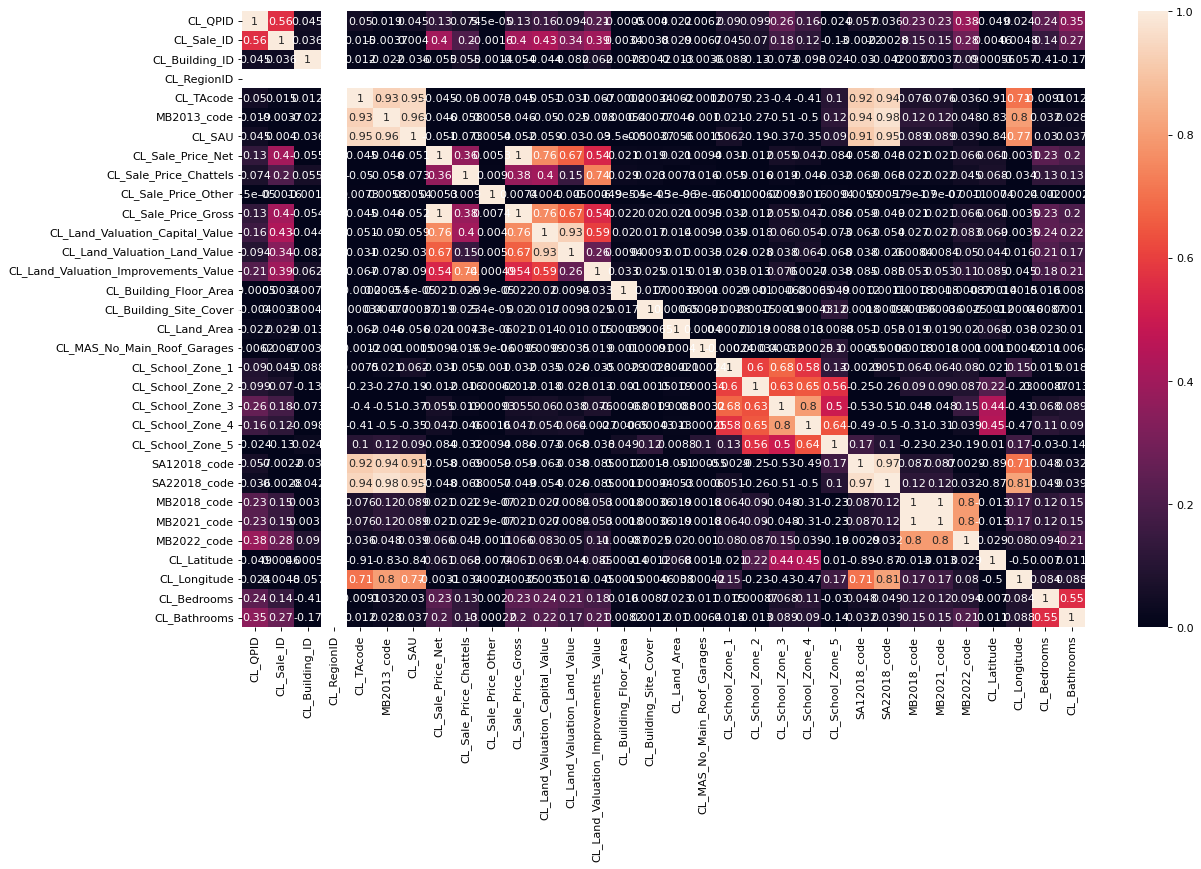

In [ ]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [ ]:
AKL_df = AKL_df.drop(['CL_Sale_ID', 'CL_Building_ID', 'CL_Situation_Number',
             'CL_Street_Name','CL_Street_Name_Suffix', 'CL_Town',
             'CL_RegionID','CL_RegionName', 'CL_TAcode', 'CL_TAName',
              'CL_SAU', 'CL_Sale_Price_Chattels'], axis = 1)

<AxesSubplot:>

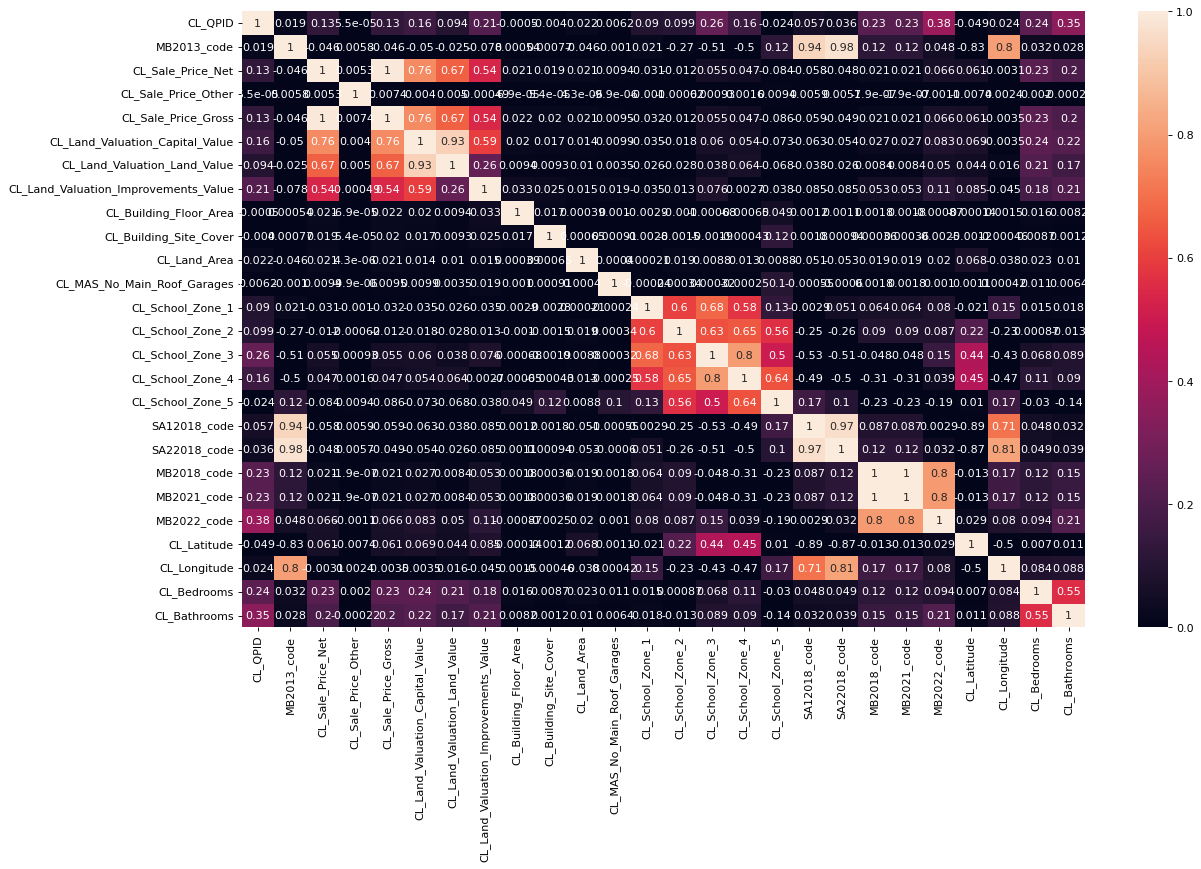

In [ ]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [ ]:
AKL_df = AKL_df.drop(['CL_Sale_Price_Other', 'CL_Sale_Price_Gross', 'CL_Land_Valuation_Land_Value', 'CL_Land_Valuation_Improvements_Value'], axis = 1)

In [ ]:
zero_sale_price = AKL_df[AKL_df['CL_Sale_Price_Net'] == 0]
print(zero_sale_price.shape)

(26, 34)


In [ ]:
AKL_df = AKL_df.drop(zero_sale_price.index)

In [ ]:
AKL_df['Log_Sale_Price_Net'] = np.log(AKL_df['CL_Sale_Price_Net'])

/Users/yangyaqi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
zero_logged_sale_price = AKL_df[AKL_df['Log_Sale_Price_Net']== 0]
print(zero_logged_sale_price.shape)

(136, 35)


In [ ]:
AKL_df = AKL_df.drop(zero_logged_sale_price.index)

<AxesSubplot:xlabel='CL_Building_Site_Cover', ylabel='Log_Sale_Price_Net'>

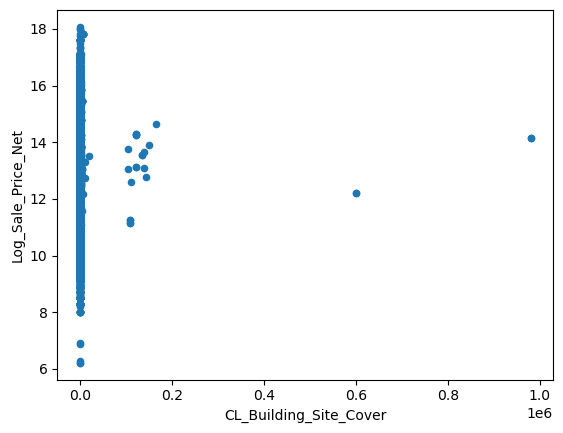

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Site_Cover']], axis=1)
data.plot.scatter(x='CL_Building_Site_Cover', y='Log_Sale_Price_Net')

In [ ]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Site_Cover'] > 475].index)

<AxesSubplot:xlabel='CL_Building_Site_Cover', ylabel='Log_Sale_Price_Net'>

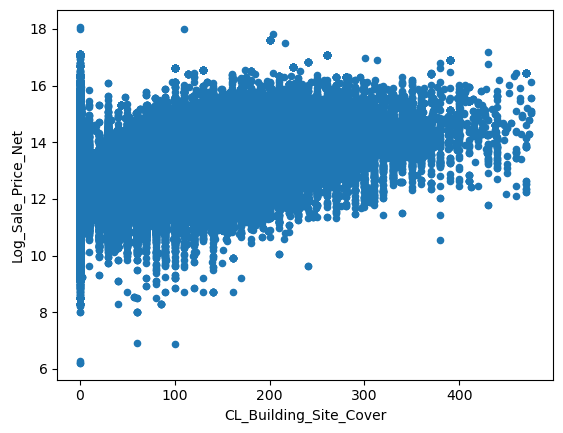

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Site_Cover']], axis=1)
data.plot.scatter(x='CL_Building_Site_Cover', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Land_Area', ylabel='Log_Sale_Price_Net'>

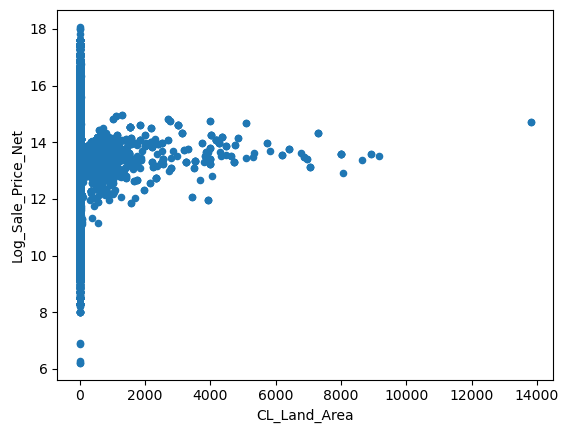

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Land_Area']], axis=1)
data.plot.scatter(x='CL_Land_Area', y='Log_Sale_Price_Net')

In [ ]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Area'] > 1.25].index)

<AxesSubplot:xlabel='CL_Land_Area', ylabel='Log_Sale_Price_Net'>

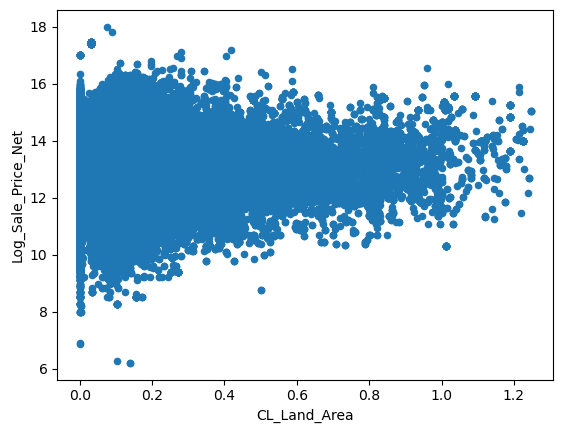

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Land_Area']], axis=1)
data.plot.scatter(x='CL_Land_Area', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_MAS_No_Main_Roof_Garages', ylabel='Log_Sale_Price_Net'>

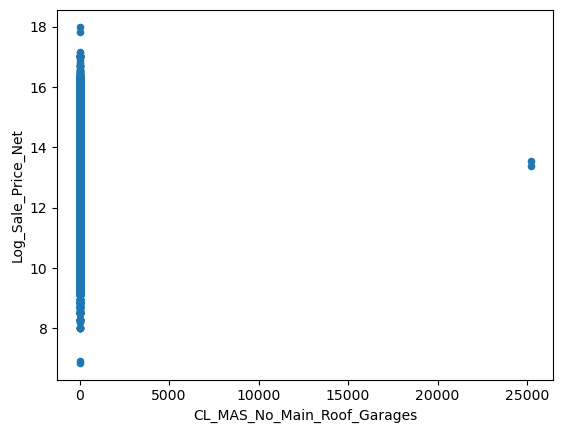

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_MAS_No_Main_Roof_Garages']], axis=1)
data.plot.scatter(x='CL_MAS_No_Main_Roof_Garages', y='Log_Sale_Price_Net')

In [ ]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_MAS_No_Main_Roof_Garages'] > 6].index)

<AxesSubplot:xlabel='CL_MAS_No_Main_Roof_Garages', ylabel='Log_Sale_Price_Net'>

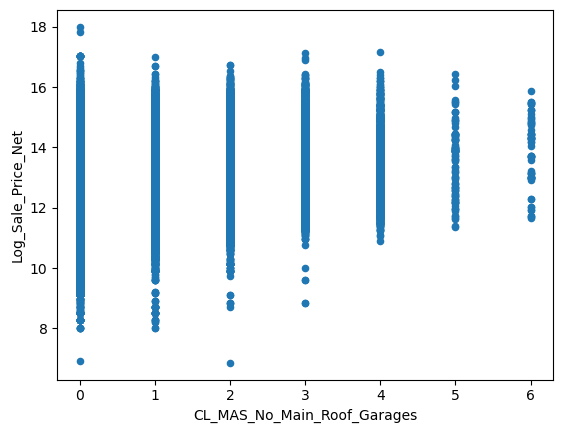

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_MAS_No_Main_Roof_Garages']], axis=1)
data.plot.scatter(x='CL_MAS_No_Main_Roof_Garages', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Building_Floor_Area', ylabel='Log_Sale_Price_Net'>

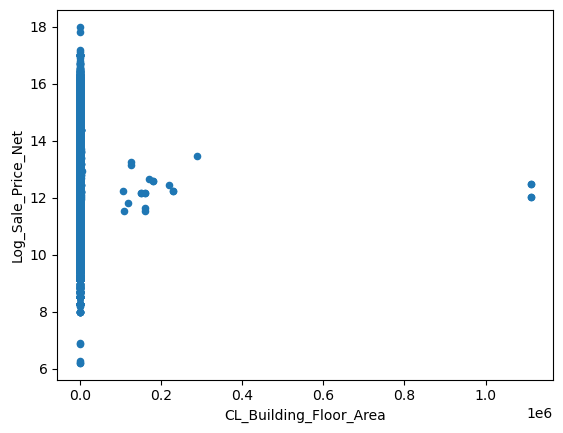

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Floor_Area']], axis=1)
data.plot.scatter(x='CL_Building_Floor_Area', y='Log_Sale_Price_Net')

In [ ]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Floor_Area'] > 700].index)

<AxesSubplot:xlabel='CL_Building_Floor_Area', ylabel='Log_Sale_Price_Net'>

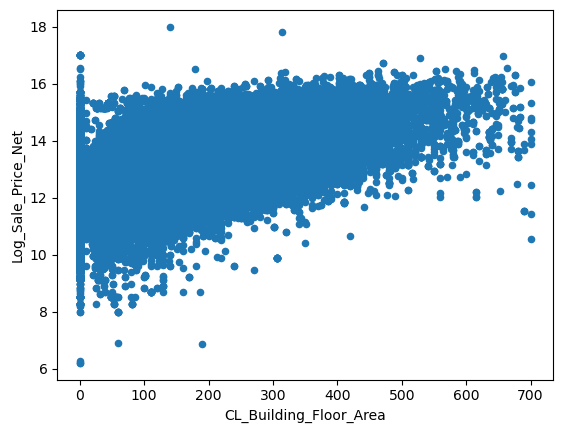

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Floor_Area']], axis=1)
data.plot.scatter(x='CL_Building_Floor_Area', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Bedrooms', ylabel='Log_Sale_Price_Net'>

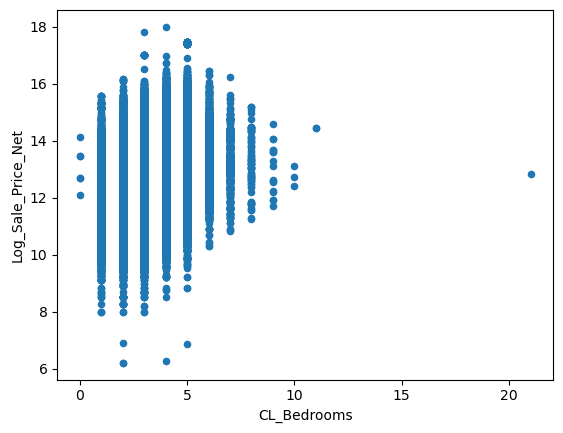

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Bedrooms']], axis=1)
data.plot.scatter(x='CL_Bedrooms', y='Log_Sale_Price_Net')

In [ ]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Bedrooms'] > 9].index)

<AxesSubplot:xlabel='CL_Bedrooms', ylabel='Log_Sale_Price_Net'>

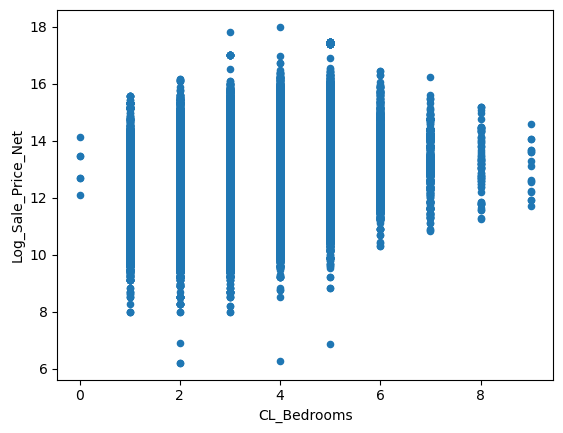

In [ ]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Bedrooms']], axis=1)
data.plot.scatter(x='CL_Bedrooms', y='Log_Sale_Price_Net')

In [ ]:
AKL_df = AKL_df.assign(school_count = AKL_df.loc[:, 'CL_School_Zone_1':'CL_School_Zone_5'].notna().sum(axis =1))
print(AKL_df.head())

        CL_QPID  CL_Suburb  MB2013_code CL_Sale_Tenure CL_Sale_Date  \
180990    75499    Te Arai     135400.0              F   2009-02-09   
180991    75494    Te Arai     135400.0              F   2007-07-20   
180992    75639  Wellsford     135700.0              F   1999-12-15   
180993    75639  Wellsford     135700.0              F   2004-02-25   
180994    75639  Wellsford     135700.0              F   1995-11-07   

        CL_Sale_Price_Net  CL_Land_Valuation_Capital_Value  \
180990           280000.0                         355000.0   
180991           311000.0                         145000.0   
180992           125000.0                         120000.0   
180993           255000.0                         120000.0   
180994            87000.0                          85000.0   

       CL_Current_Revision_Date  CL_Building_Floor_Area  \
180990               2007-09-01                   120.0   
180991               2004-09-01                    40.0   
180992               19

In [ ]:
AKL_df = AKL_df.drop(['CL_School_Zone_1','CL_School_Zone_2','CL_School_Zone_3','CL_School_Zone_4','CL_School_Zone_5'], axis = 1)

In [ ]:
AKL_df = AKL_df.drop(['CL_Current_Revision_Date','CL_Sale_Price_Net','CL_Val_Ref'], axis = 1)

In [ ]:
AKL_df.isnull().sum()

CL_QPID                                 0
CL_Suburb                               0
MB2013_code                             0
CL_Sale_Tenure                          0
CL_Sale_Date                            0
CL_Land_Valuation_Capital_Value      1356
CL_Building_Floor_Area              42692
CL_Building_Site_Cover              65215
CL_Land_Area                           89
CL_Bldg_Const                      328550
CL_Bldg_Cond                       333135
CL_Roof_Const                      302992
CL_Roof_Cond                       304715
CL_Category                             0
CL_LUD_Age                         306236
CL_LUD_Land_Use_Description           193
CL_MAS_No_Main_Roof_Garages         93475
SA12018_code                            0
SA22018_code                            0
MB2018_code                             0
MB2021_code                             0
MB2022_code                             0
CL_Latitude                          7316
CL_Longitude                      

<AxesSubplot:>

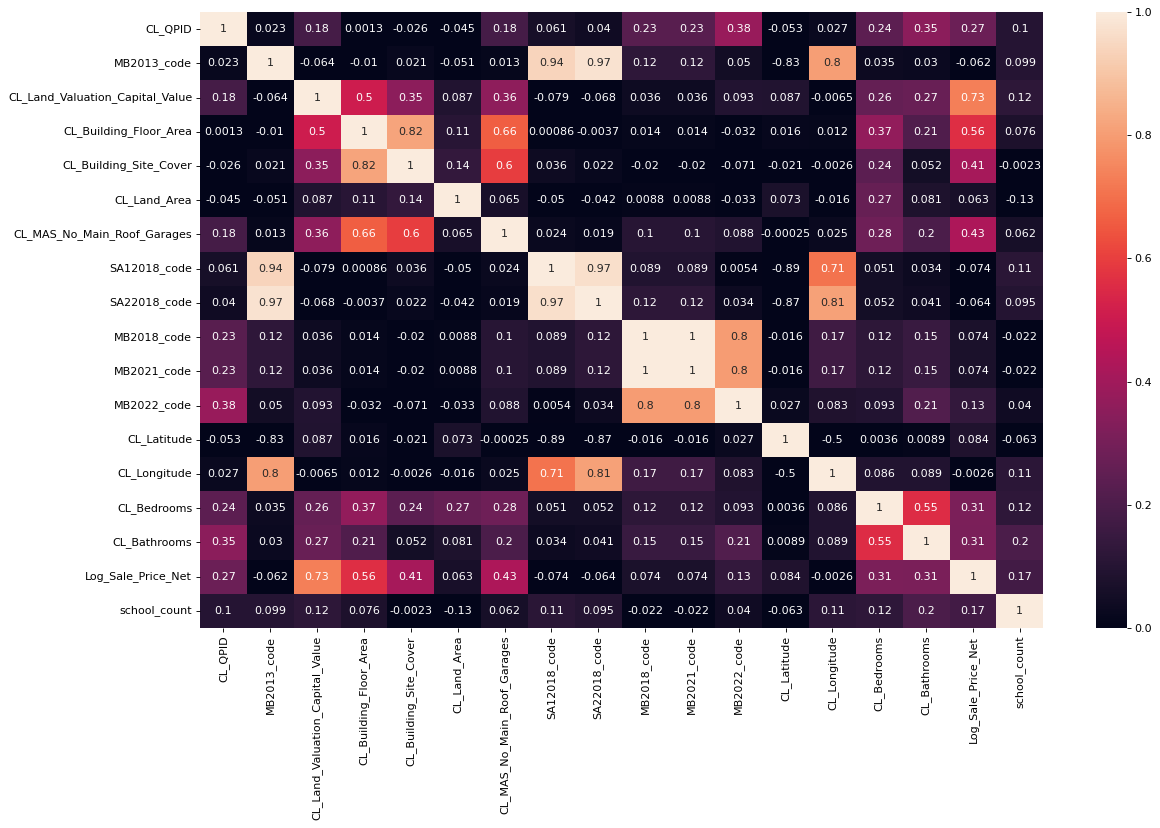

In [ ]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [ ]:
# remove category suffix
for i, row in AKL_df.iterrows():
    category = AKL_df['CL_Category'].loc[i][:2]
    AKL_df.at[i, 'CL_Category'] = category

AKL_df = AKL_df.drop(AKL_df[(AKL_df['CL_Category'] != 'RD') & (AKL_df['CL_Category'] != 'RA')].index)

In [ ]:
AKL_df['CL_Building_Site_Cover'] = AKL_df['CL_Building_Site_Cover'].fillna(0)
AKL_df['CL_MAS_No_Main_Roof_Garages'] = AKL_df['CL_MAS_No_Main_Roof_Garages'].fillna(0)

AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Floor_Area'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Suburb'].isnull()].index)

In [ ]:
for col in ('CL_Bldg_Const', 'CL_Roof_Const', 'CL_Bldg_Cond', 'CL_Roof_Cond'):
    AKL_df[col] = AKL_df[col].fillna('None')

In [ ]:
AKL_df.isnull().sum()

CL_QPID                                0
CL_Suburb                              0
MB2013_code                            0
CL_Sale_Tenure                         0
CL_Sale_Date                           0
CL_Land_Valuation_Capital_Value      956
CL_Building_Floor_Area                 0
CL_Building_Site_Cover                 0
CL_Land_Area                          22
CL_Bldg_Const                          0
CL_Bldg_Cond                           0
CL_Roof_Const                          0
CL_Roof_Cond                           0
CL_Category                            0
CL_LUD_Age                         13701
CL_LUD_Land_Use_Description            4
CL_MAS_No_Main_Roof_Garages            0
SA12018_code                           0
SA22018_code                           0
MB2018_code                            0
MB2021_code                            0
MB2022_code                            0
CL_Latitude                         5732
CL_Longitude                        5732
CL_Bedrooms     

In [ ]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Valuation_Capital_Value'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Latitude'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Longitude'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Area'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['Log_Sale_Price_Net'].isnull()].index)
AKL_df.isnull().sum()

CL_QPID                                0
CL_Suburb                              0
MB2013_code                            0
CL_Sale_Tenure                         0
CL_Sale_Date                           0
CL_Land_Valuation_Capital_Value        0
CL_Building_Floor_Area                 0
CL_Building_Site_Cover                 0
CL_Land_Area                           0
CL_Bldg_Const                          0
CL_Bldg_Cond                           0
CL_Roof_Const                          0
CL_Roof_Cond                           0
CL_Category                            0
CL_LUD_Age                         10860
CL_LUD_Land_Use_Description            4
CL_MAS_No_Main_Roof_Garages            0
SA12018_code                           0
SA22018_code                           0
MB2018_code                            0
MB2021_code                            0
MB2022_code                            0
CL_Latitude                            0
CL_Longitude                           0
CL_Bedrooms     

In [ ]:
AKL_df['CL_Bathrooms'] = AKL_df['CL_Bathrooms'].fillna(0)
AKL_df=AKL_df.drop(AKL_df[AKL_df['CL_LUD_Land_Use_Description'].isnull()].index)
AKL_df['CL_LUD_Age'] = AKL_df['CL_LUD_Age'].fillna('None')
AKL_df.isnull().sum()

CL_QPID                                0
CL_Suburb                              0
MB2013_code                            0
CL_Sale_Tenure                         0
CL_Sale_Date                           0
CL_Land_Valuation_Capital_Value        0
CL_Building_Floor_Area                 0
CL_Building_Site_Cover                 0
CL_Land_Area                           0
CL_Bldg_Const                          0
CL_Bldg_Cond                           0
CL_Roof_Const                          0
CL_Roof_Cond                           0
CL_Category                            0
CL_LUD_Age                             0
CL_LUD_Land_Use_Description            0
CL_MAS_No_Main_Roof_Garages            0
SA12018_code                           0
SA22018_code                           0
MB2018_code                            0
MB2021_code                            0
MB2022_code                            0
CL_Latitude                            0
CL_Longitude                           0
CL_Bedrooms     

In [ ]:
AKL_df=AKL_df.drop(AKL_df[AKL_df['CL_Bedrooms'].isnull()].index)
AKL_df.isnull().sum()

CL_QPID                            0
CL_Suburb                          0
MB2013_code                        0
CL_Sale_Tenure                     0
CL_Sale_Date                       0
CL_Land_Valuation_Capital_Value    0
CL_Building_Floor_Area             0
CL_Building_Site_Cover             0
CL_Land_Area                       0
CL_Bldg_Const                      0
CL_Bldg_Cond                       0
CL_Roof_Const                      0
CL_Roof_Cond                       0
CL_Category                        0
CL_LUD_Age                         0
CL_LUD_Land_Use_Description        0
CL_MAS_No_Main_Roof_Garages        0
SA12018_code                       0
SA22018_code                       0
MB2018_code                        0
MB2021_code                        0
MB2022_code                        0
CL_Latitude                        0
CL_Longitude                       0
CL_Bedrooms                        0
CL_Bathrooms                       0
Log_Sale_Price_Net                 0
s

In [ ]:
print(AKL_df.head(10))

        CL_QPID  CL_Suburb  MB2013_code CL_Sale_Tenure CL_Sale_Date  \
180990    75499    Te Arai     135400.0              F   2009-02-09   
180992    75639  Wellsford     135700.0              F   1999-12-15   
180993    75639  Wellsford     135700.0              F   2004-02-25   
180994    75639  Wellsford     135700.0              F   1995-11-07   
180995    75639  Wellsford     135700.0              F   2003-07-07   
180996    75654  Wellsford     135700.0              F   2005-01-27   
180997    75654  Wellsford     135700.0              F   1998-12-17   
180998    75654  Wellsford     135700.0              F   2004-03-31   
180999    75654  Wellsford     135700.0              F   2013-09-17   
181000    75654  Wellsford     135700.0              F   2007-05-31   

        CL_Land_Valuation_Capital_Value  CL_Building_Floor_Area  \
180990                         355000.0                   120.0   
180992                         120000.0                   120.0   
180993           

In [ ]:
AKL_df_groupby = AKL_df.groupby('SA12018_code').median()
print(AKL_df_groupby.columns)
print(AKL_df.columns)

Index(['CL_QPID', 'MB2013_code', 'CL_Land_Valuation_Capital_Value',
       'CL_Building_Floor_Area', 'CL_Building_Site_Cover', 'CL_Land_Area',
       'CL_MAS_No_Main_Roof_Garages', 'SA22018_code', 'MB2018_code',
       'MB2021_code', 'MB2022_code', 'CL_Latitude', 'CL_Longitude',
       'CL_Bedrooms', 'CL_Bathrooms', 'Log_Sale_Price_Net', 'school_count'],
      dtype='object')
Index(['CL_QPID', 'CL_Suburb', 'MB2013_code', 'CL_Sale_Tenure', 'CL_Sale_Date',
       'CL_Land_Valuation_Capital_Value', 'CL_Building_Floor_Area',
       'CL_Building_Site_Cover', 'CL_Land_Area', 'CL_Bldg_Const',
       'CL_Bldg_Cond', 'CL_Roof_Const', 'CL_Roof_Cond', 'CL_Category',
       'CL_LUD_Age', 'CL_LUD_Land_Use_Description',
       'CL_MAS_No_Main_Roof_Garages', 'SA12018_code', 'SA22018_code',
       'MB2018_code', 'MB2021_code', 'MB2022_code', 'CL_Latitude',
       'CL_Longitude', 'CL_Bedrooms', 'CL_Bathrooms', 'Log_Sale_Price_Net',
       'school_count'],
      dtype='object')


In [ ]:
AKL_df_groupby

,CL_QPID,MB2013_code,CL_Land_Valuation_Capital_Value,CL_Building_Floor_Area,CL_Building_Site_Cover,CL_Land_Area,CL_MAS_No_Main_Roof_Garages,SA22018_code,MB2018_code,MB2021_code,MB2022_code,CL_Latitude,CL_Longitude,CL_Bedrooms,CL_Bathrooms,Log_Sale_Price_Net,school_count
SA12018_code,,,,,,,,,,,,,,,,,
7001130,323176.0,438700.0,217000.0,87.0,30.0,0.16005,0.0,111800.0,438700.0,438700.0,438700.0,-36.156606,175.390224,2.0,1.0,12.577041,0.0
7001131,323580.0,438901.0,225000.0,77.0,50.0,0.08790,0.0,111800.0,4001360.0,4001360.0,4014650.0,-36.245525,175.436822,2.0,1.0,12.396693,0.0
7001132,323464.0,439000.0,152000.0,77.0,40.0,0.08300,0.0,111800.0,4011716.0,4011716.0,4011716.0,-36.247813,175.460626,2.0,1.0,12.013701,0.0
7001133,322702.0,439200.0,261500.0,45.0,0.0,0.11410,0.0,111800.0,439200.0,439200.0,439200.0,-36.300883,175.479216,1.0,1.0,12.236150,0.0
7001134,323741.0,439100.0,280000.0,84.0,40.0,0.08420,0.0,111800.0,4001579.0,4001579.0,4001579.0,-36.265522,175.489911,2.0,1.0,12.706848,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010568,319778.0,824301.0,129000.0,70.0,70.0,0.11180,0.0,166200.0,824301.0,824301.0,824301.0,-37.222272,174.912136,2.0,1.0,11.944687,2.0
7010570,1741316.0,823900.0,205000.0,111.0,110.0,0.04000,0.0,166000.0,4011527.0,4011527.0,4011527.0,-37.208860,174.905742,3.0,1.0,12.445090,4.0
7010578,1740448.0,816900.0,301000.0,154.0,130.0,0.08330,1.0,166200.0,4011444.0,4011444.0,4011444.0,-37.198236,174.914967,4.0,1.0,12.736701,3.0


In [ ]:
AKL_df_groupby = AKL_df_groupby.rename(columns={'CL_Land_Valuation_Capital_Value':"median_CV",
                       'CL_Building_Floor_Area':'median_FA',
                       'CL_Land_Area':'median_AR',
                       'Log_Sale_Price_Net':'median_Price',
                       'school_count':'median_school',
                       'CL_Bathrooms':'median_Bath',
                       'CL_Bedrooms':'median_bed'
                        
                      })
AKL_df_groupby = AKL_df_groupby.drop(columns=['CL_QPID','MB2013_code','CL_Building_Site_Cover','CL_MAS_No_Main_Roof_Garages','SA22018_code','MB2018_code','MB2021_code','MB2022_code','CL_Latitude','CL_Longitude'])
AKL_df_groupby = AKL_df_groupby.reset_index()
AKL_df_groupby.head()

,SA12018_code,mean_CV,mean_FA,mean_AR,mean_bed,mean_Bath,mean_Price,mean_school
0,7001130,217000.0,87.0,0.16005,2.0,1.0,12.577041,0.0
1,7001131,225000.0,77.0,0.08790,2.0,1.0,12.396693,0.0
2,7001132,152000.0,77.0,0.08300,2.0,1.0,12.013701,0.0
3,7001133,261500.0,45.0,0.11410,1.0,1.0,12.236150,0.0
4,7001134,280000.0,84.0,0.08420,2.0,1.0,12.706848,0.0


In [ ]:
AKL_df.shape

(1062350, 28)

In [ ]:
AKL_df_property = AKL_df_groupby.join(AKL_df.set_index('SA12018_code'),on='SA12018_code')
AKL_df_property
# AKL_df_property = AKL_df_property.drop(columns=['index'])

,SA12018_code,mean_CV,mean_FA,mean_AR,mean_bed,mean_Bath,mean_Price,mean_school,CL_QPID,CL_Suburb,MB2013_code,CL_Sale_Tenure,CL_Sale_Date,CL_Land_Valuation_Capital_Value,CL_Building_Floor_Area,CL_Building_Site_Cover,CL_Land_Area,CL_Bldg_Const,CL_Bldg_Cond,CL_Roof_Const,CL_Roof_Cond,CL_Category,CL_LUD_Age,CL_LUD_Land_Use_Description,CL_MAS_No_Main_Roof_Garages,SA22018_code,MB2018_code,MB2021_code,MB2022_code,CL_Latitude,CL_Longitude,CL_Bedrooms,CL_Bathrooms,Log_Sale_Price_Net,school_count
0,7001130,217000.0,87.0,0.16005,2.0,1.0,12.577041,0.0,99832,Saint Heliers,438800.0,L,1990-03-03,240000.0,180.0,180.0,0.0647,Weatherboard,Average,Tile Profile,Average,RD,1960,Single Unit excluding Bach,1.0,111800,438800,438800,438800,-36.173795,175.493763,3.0,2.0,12.769965,2
0,7001130,217000.0,87.0,0.16005,2.0,1.0,12.577041,0.0,99832,Saint Heliers,438800.0,F,1997-11-09,370000.0,180.0,180.0,0.0647,Weatherboard,Average,Tile Profile,Average,RD,1960,Single Unit excluding Bach,1.0,111800,438800,438800,438800,-36.173795,175.493763,3.0,2.0,12.810389,2
0,7001130,217000.0,87.0,0.16005,2.0,1.0,12.577041,0.0,323179,Great Barrier Island (Aotea Island),438800.0,F,2006-12-14,406000.0,78.0,0.0,0.1622,Fibre Cement,Average,Steel/G-Iron,Average,RD,1990,Single Unit excluding Bach,0.0,111800,438800,438800,438800,-36.178113,175.360303,1.0,1.0,12.842649,0
0,7001130,217000.0,87.0,0.16005,2.0,1.0,12.577041,0.0,323176,Great Barrier Island (Aotea Island),438800.0,F,1993-05-28,70000.0,60.0,60.0,0.1548,Fibre Cement,Good,Steel/G-Iron,Good,RD,1970,Single Unit excluding Bach,0.0,111800,438800,438800,438800,-36.177727,175.359824,2.0,2.0,11.112448,0
0,7001130,217000.0,87.0,0.16005,2.0,1.0,12.577041,0.0,323176,Great Barrier Island (Aotea Island),438800.0,F,1995-03-07,120000.0,60.0,60.0,0.1548,Fibre Cement,Good,Steel/G-Iron,Good,RD,1970,Single Unit excluding Bach,0.0,111800,438800,438800,438800,-36.177727,175.359824,2.0,2.0,12.025749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8008,7010579,192500.0,180.0,0.25780,4.0,1.0,12.463681,2.0,320364,Buckland,827100.0,F,1997-07-25,165000.0,180.0,180.0,0.2578,Weatherboard,Average,Steel/G-Iron,Average,RD,1910,Single Unit excluding Bach,2.0,166200,827100,827100,827100,-37.221551,174.931254,4.0,1.0,12.506177,2
8008,7010579,192500.0,180.0,0.25780,4.0,1.0,12.463681,2.0,320377,Buckland,827100.0,F,2003-07-04,220000.0,113.0,130.0,0.2163,None,Good,Steel/G-Iron,Average,RD,1950,Single Unit excluding Bach,1.0,166200,827100,827100,827100,-37.223247,174.930862,3.0,1.0,12.421184,2
8009,7010952,345000.0,157.0,0.16360,3.0,1.0,12.591335,1.0,317938,Waiuku,831800.0,F,2010-01-18,345000.0,157.0,157.0,0.1636,Weatherboard,Average,Steel/G-Iron,Average,RD,None,Single Unit excluding Bach,0.0,169700,831800,831800,831800,-37.262089,174.730603,3.0,1.0,12.591335,1
8009,7010952,345000.0,157.0,0.16360,3.0,1.0,12.591335,1.0,317938,Waiuku,831800.0,F,1992-03-27,100000.0,150.0,130.0,0.1636,Weatherboard,Average,Steel/G-Iron,Average,RD,B1920,Single Unit excluding Bach,0.0,169700,831800,831800,831800,-37.262089,174.730603,3.0,1.0,11.608236,1


In [ ]:
df_property_final = AKL_df_property.drop(labels = ["MB2018_code",
                   "MB2021_code","MB2022_code",
                   "CL_Latitude","CL_Longitude",
                   "MB2013_code","SA22018_code",
                   "CL_QPID","CL_Sale_Tenure","CL_Sale_Date",
                   "CL_Land_Valuation_Capital_Value","CL_Building_Floor_Area",
                   "CL_Building_Site_Cover","CL_Land_Area",
                   "CL_Bldg_Const","CL_Bldg_Cond","CL_Roof_Const","CL_Roof_Cond",
                   "CL_Category","CL_LUD_Age","CL_LUD_Land_Use_Description","CL_MAS_No_Main_Roof_Garages",
                   "CL_Bedrooms","CL_Bathrooms","school_count","Log_Sale_Price_Net",
                   "CL_Suburb"], axis = 1)
df_property_final = df_property_final.drop_duplicates()
df_property_final

,SA12018_code,mean_CV,mean_FA,mean_AR,mean_bed,mean_Bath,mean_Price,mean_school
0,7001130,217000.0,87.0,0.16005,2.0,1.0,12.577041,0.0
1,7001131,225000.0,77.0,0.08790,2.0,1.0,12.396693,0.0
2,7001132,152000.0,77.0,0.08300,2.0,1.0,12.013701,0.0
3,7001133,261500.0,45.0,0.11410,1.0,1.0,12.236150,0.0
4,7001134,280000.0,84.0,0.08420,2.0,1.0,12.706848,0.0
...,...,...,...,...,...,...,...,...
8005,7010568,129000.0,70.0,0.11180,2.0,1.0,11.944687,2.0
8006,7010570,205000.0,111.0,0.04000,3.0,1.0,12.445090,4.0
8007,7010578,301000.0,154.0,0.08330,4.0,1.0,12.736701,3.0
8008,7010579,192500.0,180.0,0.25780,4.0,1.0,12.463681,2.0


In [ ]:
census = pd.read_csv('/Users/yangyaqi/desktop/cs760/outputs/cleaned_census.csv')
finalData = census.merge(df_property_final,on='SA12018_code')

In [ ]:
finalData

,Unnamed: 0,SA12018_code,averge_room,Male,Female,Average Age,European,Māori,Pacific Peoples,Asian,Middle Eastern / Latin American / African,Other Ethnicity,New Zealander(19),Other Ethnicity nec(19),Median personal income($),Employed Full time,Employed Part time,Unemployed,Paid employee,Employer,Self employed and without employees,Unpaid family worker,mean_CV,mean_FA,mean_AR,mean_bed,mean_Bath,mean_Price,mean_school
0,0,7001130,2.684211,0.580000,0.420000,41.423077,0.703125,0.265625,0.000000,0.000000,0.000000,0.015625,0.015625,0.000000,25500,0.357143,0.125000,0.035714,0.339286,0.035714,0.089285714,0.017857,217000.0,87.0,0.16005,2.0,1.0,12.577041,0.0
1,1,7001131,2.161290,0.547170,0.452830,50.076923,0.746032,0.142857,0.047619,0.015873,0.000000,0.015873,0.015873,0.015873,18900,0.234043,0.191489,0.106383,0.297872,0.042553,0.085106383,0.042553,225000.0,77.0,0.08790,2.0,1.0,12.396693,0.0
2,2,7001132,2.266667,0.568182,0.431818,48.190476,0.788462,0.173077,0.019231,0.019231,0.000000,0.000000,0.000000,0.000000,24600,0.277778,0.185185,0.092593,0.277778,0.037037,Employed Full time,0.018519,152000.0,77.0,0.08300,2.0,1.0,12.013701,0.0
3,3,7001133,2.894737,0.534884,0.465116,48.162791,0.836735,0.102041,0.000000,0.020408,0.000000,0.020408,0.020408,0.000000,21600,0.325581,0.162791,0.023256,0.325581,0.046512,0.093023256,0.023256,261500.0,45.0,0.11410,1.0,1.0,12.236150,0.0
4,4,7001134,2.882353,0.640000,0.360000,51.130435,0.884615,0.038462,0.000000,0.000000,0.000000,0.038462,0.038462,0.000000,19700,0.318182,0.136364,0.090909,0.272727,0.000000,0.181818182,0.000000,280000.0,84.0,0.08420,2.0,1.0,12.706848,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,9213,7010567,3.416667,0.468750,0.531250,36.864865,0.702703,0.189189,0.054054,0.054054,0.000000,0.000000,0.000000,0.000000,35000,0.395349,0.093023,0.023256,0.372093,0.023256,0.069767442,0.023256,365000.0,160.0,0.09280,3.0,1.0,12.917060,3.0
7934,9214,7010568,3.000000,0.500000,0.500000,39.000000,0.627907,0.093023,0.069767,0.209302,0.000000,0.000000,0.000000,0.000000,42200,0.384615,0.102564,0.025641,0.358974,0.051282,0.025641026,0.051282,129000.0,70.0,0.11180,2.0,1.0,11.944687,2.0
7935,9216,7010570,2.833333,0.705882,0.294118,41.736842,0.700000,0.100000,0.050000,0.150000,0.000000,0.000000,0.000000,0.000000,41100,0.423077,0.076923,0.038462,0.461538,0.000000,0,0.000000,205000.0,111.0,0.04000,3.0,1.0,12.445090,4.0
7936,9224,7010578,3.400000,0.512195,0.487805,38.704545,0.687500,0.125000,0.000000,0.104167,0.020833,0.041667,0.020833,0.000000,43600,0.372549,0.117647,0.019608,0.333333,0.039216,0.098039216,0.019608,301000.0,154.0,0.08330,4.0,1.0,12.736701,3.0


In [ ]:
finalData.columns

Index(['Unnamed: 0', 'SA12018_code', 'averge_room', 'Male', 'Female',
       'Average Age', 'European', 'Māori', 'Pacific Peoples', 'Asian',
       'Middle Eastern / Latin American / African', 'Other Ethnicity',
       'New Zealander(19)', 'Other Ethnicity nec(19)',
       'Median personal income($)', 'Employed Full time', 'Employed Part time',
       'Unemployed', 'Paid employee', 'Employer',
       'Self employed and without employees', 'Unpaid family worker',
       'mean_CV', 'mean_FA', 'mean_AR', 'mean_bed', 'mean_Bath', 'mean_Price',
       'mean_school'],
      dtype='object')

In [ ]:
# for i, row in finalData.iterrows():
#     sale_date = finalData['CL_Sale_Date'].loc[i]
#     rfind_s = sale_date.rfind('-')
#     date = sale_date[:rfind_s].replace('-', '')
#     finalData.at[i, 'CL_Sale_Date'] = date

# Encode string column

In [ ]:
object_cols = finalData.columns[finalData.dtypes == 'object']

for col in object_cols:
    encoder = LabelEncoder()
    encoder.fit(list(finalData[col].values))
    finalData[col] = encoder.transform(list(finalData[col].values))
print(finalData[object_cols])

      Self employed and without employees
0                                     382
1                                     364
2                                     535
3                                     392
4                                     527
...                                   ...
7933                                  309
7934                                  106
7935                                    0
7936                                  409
7937                                  388

[7938 rows x 1 columns]


# Numeric Column Preprocess

In [ ]:
# numeric_cols = ['CL_Land_Valuation_Capital_Value', 'CL_Building_Floor_Area',
#        'CL_Building_Site_Cover', 'CL_Land_Area', 'CL_MAS_No_Main_Roof_Garages',
#        'CL_Bedrooms', 'CL_Bathrooms']
numeric_cols = ['mean_CV','mean_FA','mean_AR','mean_bed','mean_Bath']
print(numeric_cols)

['mean_CV', 'mean_FA', 'mean_AR', 'mean_bed', 'mean_Bath']


In [ ]:
numeric_col_means = finalData.loc[:, numeric_cols].mean()
numeric_col_std = finalData.loc[:, numeric_cols].std()
finalData.loc[:, numeric_cols] = (finalData.loc[:, numeric_cols] - numeric_col_means) /numeric_col_std

In [ ]:
sc = StandardScaler()
finalData.loc[:, numeric_cols] = sc.fit_transform(finalData.loc[:, numeric_cols])

In [ ]:
print(finalData.head(10))

   Unnamed: 0  SA12018_code  averge_room      Male    Female  Average Age  \
0           0       7001130     2.684211  0.580000  0.420000    41.423077   
1           1       7001131     2.161290  0.547170  0.452830    50.076923   
2           2       7001132     2.266667  0.568182  0.431818    48.190476   
3           3       7001133     2.894737  0.534884  0.465116    48.162791   
4           4       7001134     2.882353  0.640000  0.360000    51.130435   
5           5       7001135     2.310345  0.500000  0.500000    46.402985   
6           6       7001136     2.066667  0.481481  0.518519    49.222222   
7           7       7001137     3.222222  0.500000  0.500000    39.363636   
8           8       7001138     3.562500  0.500000  0.500000    33.724138   
9           9       7001139     3.238095  0.484375  0.515625    39.500000   

   European     Māori  Pacific Peoples     Asian  \
0  0.703125  0.265625         0.000000  0.000000   
1  0.746032  0.142857         0.047619  0.015873

In [ ]:
finalData=finalData.drop('Unnamed: 0',axis=1)

In [ ]:
finalData.to_csv("/Users/yangyaqi/desktop/cs760/outputs/Final_property_census_data.csv")

# Crime Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_crime = pd.read_csv('/content/drive/MyDrive/760/Final Data/Crime/Final_crime_data.csv')

FileNotFoundError: ignored

In [ ]:
df_crime = df_crime.rename(columns={'MB2013 code':'MB2013_code'})

In [ ]:
df_crime_auckland = df_crime[df_crime["Region"] =='Auckland Region']
df_crime_auckland = df_crime_auckland.reset_index(drop=True)
df_crime_auckland

,Unnamed: 0,Hour,Occurrence Day Of Week,ANZSOC Division,Map Detail Name,ANZSOC Group,Area Unit,Occurrence Hour Of Day,Region,Territorial Authority,Year Month,REGC2014 label,Ta2014 Nam,Number of Victimisations,Victimisations,MB2013_code,Weapon,Mb2014
0,27,9,Thu,Theft and Related Offences,Auckland,Illegal Use of a Motor Vehicle,Takanini South.,9,Auckland Region,Auckland.,1/01/2019,Auckland Region,Auckland,1,1,767705.0,Not Applicable,NaN
1,34,2,Fri,Acts Intended to Cause Injury,Auckland,Common Assault,Manukau Central.,2,Auckland Region,Auckland.,1/02/2019,Auckland Region,Auckland,1,1,781200.0,None,NaN
2,52,20,Mon,Theft and Related Offences,Auckland,Theft of Motor Vehicle Parts or Contents,Papatoetoe West.,20,Auckland Region,Auckland.,1/12/2018,Auckland Region,Auckland,2,2,659702.0,Not Applicable,NaN
3,68,9,Fri,Acts Intended to Cause Injury,Auckland,Common Assault,Otahuhu West.,9,Auckland Region,Auckland.,1/02/2019,Auckland Region,Auckland,1,1,783000.0,None,NaN
4,75,10,Tue,Acts Intended to Cause Injury,Auckland,Serious Assault Resulting in Injury,Papakura North.,10,Auckland Region,Auckland.,1/02/2019,Auckland Region,Auckland,1,1,790602.0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158398,76367,21,Sun,Theft and Related Offences,Auckland,"Theft (Except Motor Vehicles), N.E.C.",Wade Heads.,21,Auckland Region,Auckland.,1/02/2022,Auckland Region,Auckland,1,1,174007.0,NaN,174007.0
158399,76368,20,Tue,"Unlawful Entry With Intent/Burglary, Break and...",Auckland,"Unlawful Entry With Intent/Burglary, Break and...",Three Kings.,20,Auckland Region,Auckland.,1/04/2022,Auckland Region,Auckland,2,2,561100.0,NaN,561100.0
158400,76369,23,Sat,"Unlawful Entry With Intent/Burglary, Break and...",Auckland,"Unlawful Entry With Intent/Burglary, Break and...",Westlake.,23,Auckland Region,Auckland.,1/04/2022,Auckland Region,Auckland,1,1,305100.0,NaN,305100.0
158401,76370,21,Fri,"Unlawful Entry With Intent/Burglary, Break and...",Auckland,"Unlawful Entry With Intent/Burglary, Break and...",Mt Wellington South.,21,Auckland Region,Auckland.,1/04/2022,Auckland Region,Auckland,2,2,637500.0,NaN,637500.0


In [ ]:
df_crime_auckland['Weapon'] = df_crime_auckland['Weapon'].replace(['Not Applicable','None','Not Stated',np.nan],'No Weapon')

In [ ]:
df_crime_auckland.isnull().sum()

Unnamed: 0                      0
Hour                            0
Occurrence Day Of Week          0
ANZSOC Division                 0
Map Detail Name                 0
ANZSOC Group                    0
Area Unit                       0
Occurrence Hour Of Day          0
Region                          0
Territorial Authority           0
Year Month                  24486
REGC2014 label                  0
Ta2014 Nam                      0
Number of Victimisations        0
Victimisations                  0
MB2013_code                     0
Weapon                          0
Mb2014                      82099
dtype: int64

In [ ]:
df_mapping_mb2013_SA2018 = df_mapping[['SA12018_code','MB2013_code']]
df_mapping_mb2013_SA2018

,SA12018_code,MB2013_code
0,7000000,100
1,7000002,501
2,7000001,502
3,7000003,700
4,7000003,800
...,...,...
56977,7014616,1206806
56978,7005328,441200
56979,7006278,502601
56980,7018787,1799401


In [ ]:
df_mapping_mb2013_SA2018_drop = df_mapping_mb2013_SA2018.drop_duplicates()
df_mapping_mb2013_SA2018_drop

,SA12018_code,MB2013_code
0,7000000,100
1,7000002,501
2,7000001,502
3,7000003,700
4,7000003,800
...,...,...
56686,7001894,178607
56799,7026444,2554600
56800,7021401,2157500
56899,7005922,617800


In [ ]:
print(len(set(df_mapping_mb2013_SA2018_drop['MB2013_code'])))
print(len(set(df_mapping_mb2013_SA2018_drop['SA12018_code'])))

46637
29889


In [ ]:
new_crime = df_crime_auckland.merge(df_mapping_mb2013_SA2018_drop,on='MB2013_code',how='left')
new_crime

,Unnamed: 0,Hour,Occurrence Day Of Week,ANZSOC Division,Map Detail Name,ANZSOC Group,Area Unit,Occurrence Hour Of Day,Region,Territorial Authority,Year Month,REGC2014 label,Ta2014 Nam,Number of Victimisations,Victimisations,MB2013_code,Weapon,Mb2014,SA12018_code
0,27,9,Thu,Theft and Related Offences,Auckland,Illegal Use of a Motor Vehicle,Takanini South.,9,Auckland Region,Auckland.,1/01/2019,Auckland Region,Auckland,1,1,767705.0,No Weapon,NaN,7009983
1,34,2,Fri,Acts Intended to Cause Injury,Auckland,Common Assault,Manukau Central.,2,Auckland Region,Auckland.,1/02/2019,Auckland Region,Auckland,1,1,781200.0,No Weapon,NaN,7009411
2,52,20,Mon,Theft and Related Offences,Auckland,Theft of Motor Vehicle Parts or Contents,Papatoetoe West.,20,Auckland Region,Auckland.,1/12/2018,Auckland Region,Auckland,2,2,659702.0,No Weapon,NaN,7008558
3,52,20,Mon,Theft and Related Offences,Auckland,Theft of Motor Vehicle Parts or Contents,Papatoetoe West.,20,Auckland Region,Auckland.,1/12/2018,Auckland Region,Auckland,2,2,659702.0,No Weapon,NaN,7008563
4,68,9,Fri,Acts Intended to Cause Injury,Auckland,Common Assault,Otahuhu West.,9,Auckland Region,Auckland.,1/02/2019,Auckland Region,Auckland,1,1,783000.0,No Weapon,NaN,7008360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216195,76368,20,Tue,"Unlawful Entry With Intent/Burglary, Break and...",Auckland,"Unlawful Entry With Intent/Burglary, Break and...",Three Kings.,20,Auckland Region,Auckland.,1/04/2022,Auckland Region,Auckland,2,2,561100.0,No Weapon,561100.0,7005236
216196,76369,23,Sat,"Unlawful Entry With Intent/Burglary, Break and...",Auckland,"Unlawful Entry With Intent/Burglary, Break and...",Westlake.,23,Auckland Region,Auckland.,1/04/2022,Auckland Region,Auckland,1,1,305100.0,No Weapon,305100.0,7003078
216197,76370,21,Fri,"Unlawful Entry With Intent/Burglary, Break and...",Auckland,"Unlawful Entry With Intent/Burglary, Break and...",Mt Wellington South.,21,Auckland Region,Auckland.,1/04/2022,Auckland Region,Auckland,2,2,637500.0,No Weapon,637500.0,7008337
216198,76371,0,Thu,"Unlawful Entry With Intent/Burglary, Break and...",Auckland,"Unlawful Entry With Intent/Burglary, Break and...",Takanini North.,0,Auckland Region,Auckland.,1/03/2022,Auckland Region,Auckland,1,1,768100.0,No Weapon,768100.0,7009896


In [ ]:
print(new_crime['ANZSOC Division'].value_counts())
print()
print(new_crime['ANZSOC Group'].value_counts())
print()
print(new_crime['Weapon'].value_counts())
print()
print(new_crime['Occurrence Hour Of Day'].value_counts())

Theft and Related Offences                                           150077
Unlawful Entry With Intent/Burglary, Break and Enter                  33139
Acts Intended to Cause Injury                                         27323
Robbery, Extortion and Related Offences                                3653
Sexual Assault and Related Offences                                    1756
Abduction, Harassment and Other Related Offences Against a Person       252
Name: ANZSOC Division, dtype: int64

Theft (Except Motor Vehicles), N.E.C.                   63276
Theft From Retail Premises                              49866
Unlawful Entry With Intent/Burglary, Break and Enter    33139
Illegal Use of a Motor Vehicle                          17075
Theft of Motor Vehicle Parts or Contents                16292
Common Assault                                          13827
Serious Assault Resulting in Injury                      6943
Serious Assault Not Resulting in Injury                  6553
Aggravated 

In [ ]:
new_crime.columns

Index(['Unnamed: 0', 'Hour', 'Occurrence Day Of Week', 'ANZSOC Division',
       'Map Detail Name', 'ANZSOC Group', 'Area Unit',
       'Occurrence Hour Of Day', 'Region', 'Territorial Authority',
       'Year Month', 'REGC2014 label', 'Ta2014 Nam',
       'Number of Victimisations', 'Victimisations', 'MB2013_code', 'Weapon',
       'Mb2014', 'SA12018_code'],
      dtype='object')

In [ ]:
new_crime_drop = new_crime.drop(columns=['Unnamed: 0', 'Map Detail Name','Region', 'Territorial Authority',
               'Year Month', 'REGC2014 label', 'Ta2014 Nam', 'MB2013_code', 'Mb2014','Hour','Victimisations','Occurrence Day Of Week','Occurrence Hour Of Day'])
new_crime_drop.head()

,ANZSOC Division,ANZSOC Group,Area Unit,Number of Victimisations,Weapon,SA12018_code
0,Theft and Related Offences,Illegal Use of a Motor Vehicle,Takanini South.,1,No Weapon,7009983
1,Acts Intended to Cause Injury,Common Assault,Manukau Central.,1,No Weapon,7009411
2,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Papatoetoe West.,2,No Weapon,7008558
3,Theft and Related Offences,Theft of Motor Vehicle Parts or Contents,Papatoetoe West.,2,No Weapon,7008563
4,Acts Intended to Cause Injury,Common Assault,Otahuhu West.,1,No Weapon,7008360


## give weight on crime

In [ ]:
crime_cate = new_crime_drop.groupby('SA12018_code')['ANZSOC Group'].value_counts().unstack(fill_value=0)
crime_cate

# add weight
crime_weights = [1/len(crime_cate.columns)]*len(crime_cate.columns)
crime_cate["weighted_crime"] = crime_cate.mul(crime_weights).sum(axis=1)
crime_cate2 = crime_cate["weighted_crime"].reset_index(level=0)
crime_cate2

NameError: ignored

In [ ]:
crime_weapon = new_crime_drop.groupby(
    'SA12018_code')['Weapon'].value_counts().unstack(fill_value=0)
crime_weapon = crime_weapon.drop(columns=['No Weapon'], axis=1)
# add weight
weapon_weights = [1/len(crime_weapon.columns)]*len(crime_weapon.columns)
crime_weapon['weighted_weapon'] = crime_weapon.mul(weapon_weights).sum(axis=1)
crime_weapon2 = crime_weapon[['weighted_weapon']]
crime_weapon2 = crime_weapon2.reset_index(level=0)
crime_weapon2

In [ ]:
crime_SA1 = crime_weapon2.merge(crime_cate2,on='SA12018_code')
# crime_SA1 = crime_SA1.reset_index(level=0)
crime_SA1

In [ ]:
happens = new_crime_drop.groupby('SA12018_code').size().reset_index().rename(columns={0:'Number_of_happens'})
num_vic = new_crime_drop.groupby('SA12018_code')['Number of Victimisations'].sum().reset_index().rename(columns={0:'Sum_of_Victimisations'})

In [ ]:
crime_final = crime_SA1.merge(happens,on='SA12018_code').merge(num_vic,on='SA12018_code')

In [ ]:
crime_final